In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('datos_historicos_bcn.csv',parse_dates=['date'],index_col='date')

In [3]:
df.head()

,precipitaciones,horas_sol,temp_max,temp_min,pres_max,pres_min,racha_max,hora_racha,vel_media,year,month
date,,,,,,,,,,,
1930-01-01,0.0,NaN,8.6,4.5,NaN,NaN,0.0,NaN,0.0,1930,jan
1930-01-02,0.0,NaN,10.0,3.3,NaN,NaN,0.0,NaN,0.0,1930,jan
1930-01-03,0.0,NaN,13.0,3.6,NaN,NaN,0.0,NaN,0.0,1930,jan
1930-01-04,3.2,NaN,11.1,6.8,NaN,NaN,0.0,NaN,0.0,1930,jan
1930-01-05,54.6,NaN,10.6,7.1,NaN,NaN,0.0,NaN,0.0,1930,jan


In [4]:
df1 = df[['precipitaciones']]
df1.columns = ['rain']

In [5]:
df1.head()

,rain
date,
1930-01-01,0.0
1930-01-02,0.0
1930-01-03,0.0
1930-01-04,3.2
1930-01-05,54.6


In [6]:
df1[df1.rain.isnull()]
# there is only one missing data so i will drop it

,rain
date,
1962-09-25,NaN


In [7]:
df1 = df1.dropna()

In [8]:
df1

,rain
date,
1930-01-01,0.0
1930-01-02,0.0
1930-01-03,0.0
1930-01-04,3.2
1930-01-05,54.6
...,...
2020-12-27,0.0
2020-12-28,0.0
2020-12-29,0.0


In [9]:
df1['year'] = df1.index.year
df1['month'] = df1.index.month
month_data = {1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}
df1.month = df1.month.map(month_data).astype('category')
months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
df1.month = df1.month.cat.set_categories(months,ordered=True)

In [10]:
df1.head()

,rain,year,month
date,,,
1930-01-01,0.0,1930,jan
1930-01-02,0.0,1930,jan
1930-01-03,0.0,1930,jan
1930-01-04,3.2,1930,jan
1930-01-05,54.6,1930,jan


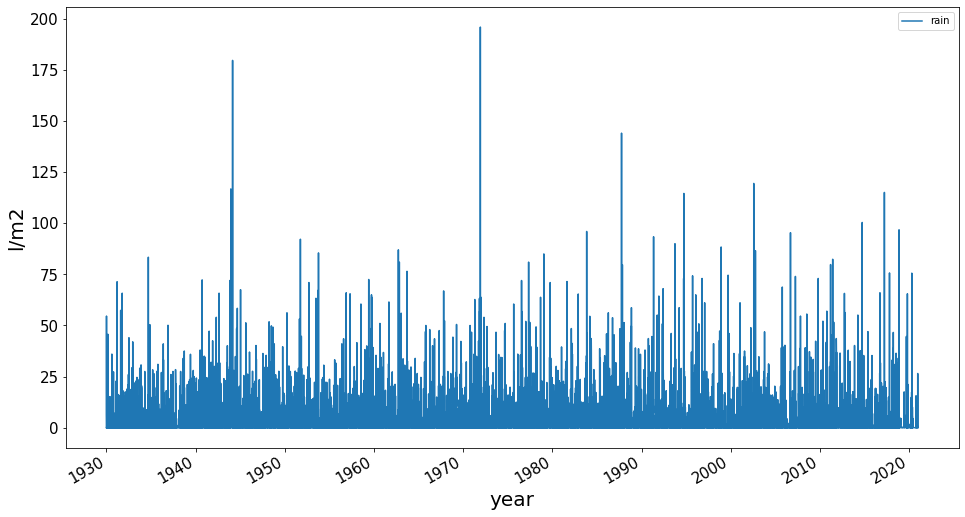

In [11]:
fig, ax = plt.subplots(figsize=(16,9))
df1.plot(y='rain',ax=ax,fontsize=15)
ax.set_ylabel('l/m2', fontsize=20)
ax.set_xlabel('year',fontsize=20)
plt.show()

In [12]:
#maximo historico
max_rain = df1.rain.max()
df1[df1.rain == max_rain]

,rain,year,month
date,,,
1971-12-05,196.0,1971,dec


In [13]:
total_days = df1.size
rain_days = df1[df1.rain>0].size

In [14]:
print(f'durante los ultimos 90 años ha llovido el {round(rain_days/total_days*100,2)} % de los dias')

durante los ultimos 90 años ha llovido el 22.7 % de los dias


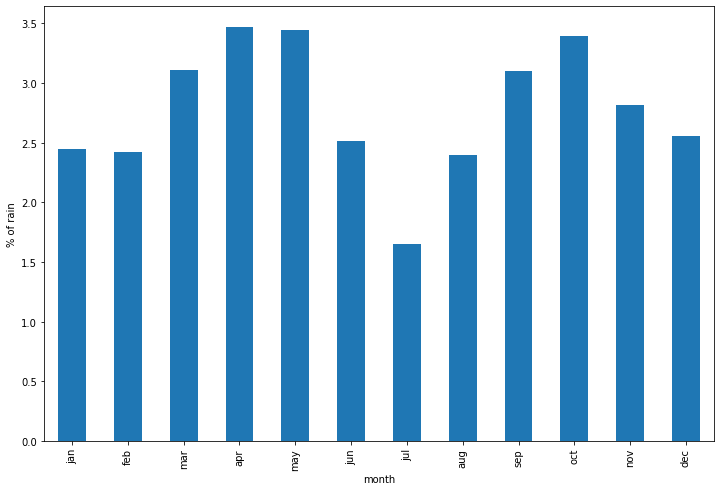

In [15]:
total = df1[df1.rain>0].size
(df1[df1.rain>0].groupby('month').size()/total*100).to_frame('perc').plot.bar(figsize=(12,8),legend=False)
plt.ylabel('% of rain')
plt.show()

In [16]:
df2 = df1[df1.rain>0].copy() # select only rainy days

In [17]:
yearly = df2.resample('Y').mean()

In [18]:
yearly

,rain,year
date,,
1930-12-31,5.360396,1930
1931-12-31,7.465476,1931
1932-12-31,6.466935,1932
1933-12-31,6.699057,1933
1934-12-31,5.818824,1934
...,...,...
2016-12-31,5.649412,2016
2017-12-31,6.646154,2017
2018-12-31,8.591304,2018


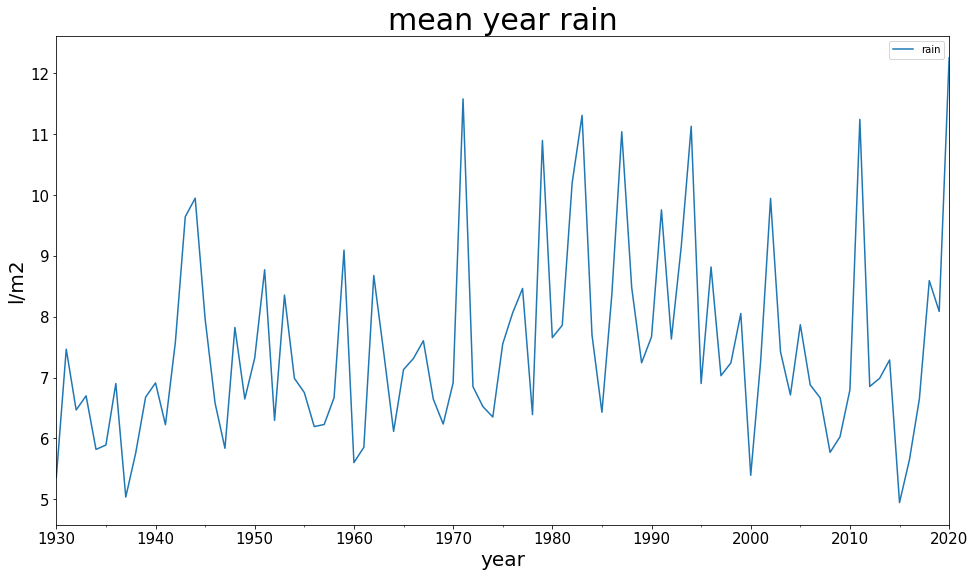

In [19]:
fig, ax = plt.subplots(figsize=(16,9))
yearly.plot(y='rain',ax=ax,fontsize=15)
ax.set_ylabel('l/m2', fontsize=20)
ax.set_xlabel('year',fontsize=20)
ax.set_title('mean year rain',fontsize=30)
plt.show()

In [20]:
yearly.mean(),yearly.median()

(rain       7.505296
 year    1975.000000
 dtype: float64,
 rain       7.12963
 year    1975.00000
 dtype: float64)

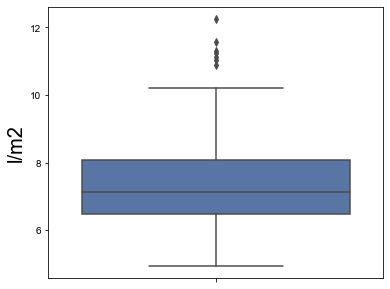

In [21]:
fig, ax = plt.subplots(figsize=(6,5))
sns.set(font_scale=2) 

sns.boxplot(y=yearly.rain)
ax.set_ylabel('l/m2',fontsize=20)
plt.show()


In [22]:
df2

,rain,year,month
date,,,
1930-01-04,3.2,1930,jan
1930-01-05,54.6,1930,jan
1930-01-06,9.6,1930,jan
1930-01-07,9.3,1930,jan
1930-01-08,6.4,1930,jan
...,...,...,...
2020-12-09,0.1,2020,dec
2020-12-10,0.7,2020,dec
2020-12-11,0.5,2020,dec


Text(0, 0.5, 'avg rain(l/m2)')

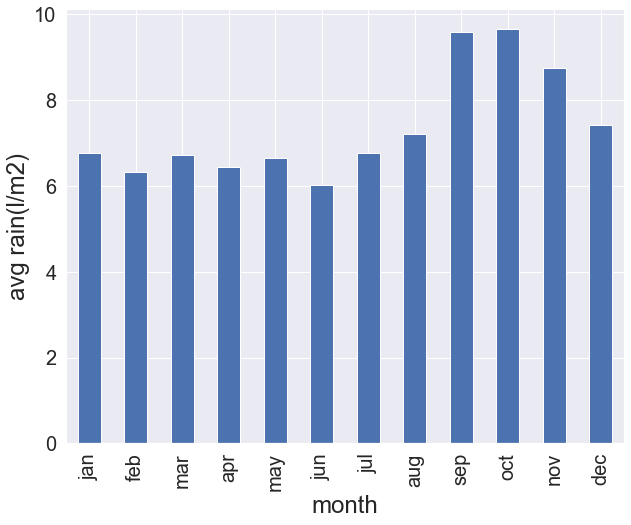

In [23]:
df2.groupby('month')['rain'].mean().plot(kind='bar',fontsize=20,figsize=(10,8))
plt.ylabel('avg rain(l/m2)')

In [24]:
def get_random_sample(data,size):
    data_out = []
    for i in range(5000):
        random_sample= data.sample(n=size, replace=True) # take a sample of a certain size with replacement
        data_out.append(random_sample.mean())
    return data_out

In [25]:
past = df2.loc[:'1999'].resample('Y').mean()
present = df2.loc['2000':].resample('Y').mean()

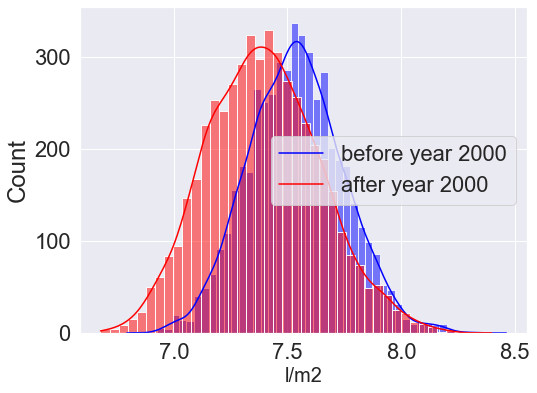

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(get_random_sample(past.rain,50),color='blue',kde=True,alpha=0.5,ax=ax)  
sns.histplot(get_random_sample(present.rain,50),color = 'red',kde=True,ax=ax)  
ax.set_xlabel('l/m2', fontsize=20)
plt.legend(['before year 2000','after year 2000'])

In [27]:
from scipy.stats import ttest_ind

In [28]:
res = ttest_ind(a=past.rain,b=present.rain)
print(res.pvalue)

0.7159252731671801


In [29]:
alpha = 0.05    
print(f'P-value is {res.pvalue*100}% and significance level (alpha) is 5% ')
if res.pvalue < alpha:
    print('WE reject NULL hypothesis that both dist are equal')
else:
    print('WE cannot reject NULL hypothesis that both distributions are equal')


P-value is 71.59252731671802% and significance level (alpha) is 5% 
WE cannot reject NULL hypothesis that both distributions are equal


In [30]:
# consideramos que ha llovido cuando el valor de la precipitacion esta por encima de los 200 ml/m2
df2['lluvia'] = np.where((df2['rain']>0.2), 1, 0) 

In [31]:
df2.head()

,rain,year,month,lluvia
date,,,,
1930-01-04,3.2,1930,jan,1
1930-01-05,54.6,1930,jan,1
1930-01-06,9.6,1930,jan,1
1930-01-07,9.3,1930,jan,1
1930-01-08,6.4,1930,jan,1


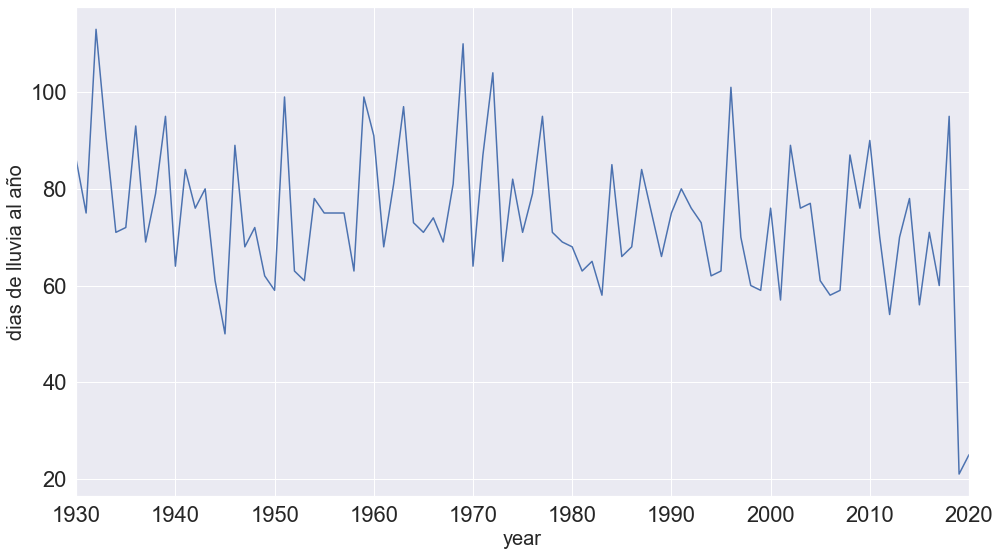

In [32]:
fig, ax = plt.subplots(figsize=(16,9))
df2.resample('Y').sum().plot(y='lluvia',ax=ax,legend=False)
ax.set_ylabel('dias de lluvia al año', fontsize=20)
ax.set_xlabel('year',fontsize=20)
plt.show()

In [33]:
past = df2.groupby('year')['lluvia'].sum().to_frame().loc[:'1999']
present = df2.groupby('year')['lluvia'].sum().to_frame().loc['2000':]

Text(0.5, 0, 'dias de lluvia al año')

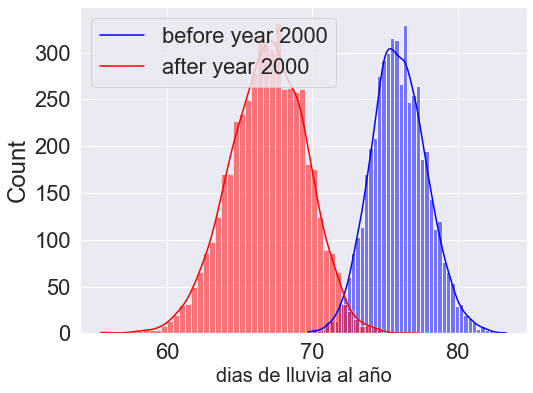

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(get_random_sample(past.lluvia,50),color='blue',kde=True,alpha=0.5,ax=ax)  
sns.histplot(get_random_sample(present.lluvia,50),color = 'red',kde=True,ax=ax)  
plt.legend(['before year 2000','after year 2000'])
ax.set_xlabel('dias de lluvia al año', fontsize=20)

In [35]:
res = ttest_ind(a=past.lluvia,b=present.lluvia)
print(res.pvalue)

0.016642719464914444


In [36]:
alpha = 0.05    
print(f'P-value is {res.pvalue*100}% and significance level (alpha) is 5% ')
if res.pvalue < alpha:
    print('WE reject NULL hypothesis that both dist are equal')
else:
    print('WE cannot reject NULL hypothesis that both distributions are equal')


P-value is 1.6642719464914444% and significance level (alpha) is 5% 
WE reject NULL hypothesis that both dist are equal


In [37]:
df2.groupby('year')['lluvia'].sum().to_frame().loc[:'1999']

,lluvia
year,
1930,86
1931,75
1932,113
1933,91
1934,71
...,...
1995,63
1996,101
1997,70


In [38]:
before = df2.loc[:'1999'].groupby('month')['rain'].mean().to_frame(name= 'before 2000')
after = df2.loc['2000':].groupby('month')['rain'].mean().to_frame(name= 'after 2000')
df3 = pd.concat([before,after],axis=1)

In [39]:
df3

,before 2000,after 2000
month,,
jan,7.056872,5.826190
feb,6.239120,6.591729
mar,6.462593,7.649359
apr,6.162862,7.356614
may,6.762604,6.306395
jun,6.238380,4.874194
jul,6.296503,8.379518
aug,7.747442,5.108411
sep,10.003189,8.204969


Text(0, 0.5, 'avg rain(l/m2)')

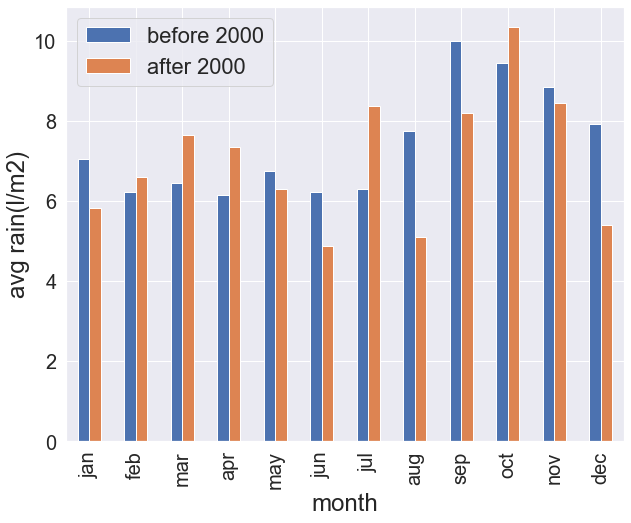

In [40]:
df3.plot(kind='bar',fontsize=20,figsize=(10,8))
plt.ylabel('avg rain(l/m2)')

In [41]:
df

,precipitaciones,horas_sol,temp_max,temp_min,pres_max,pres_min,racha_max,hora_racha,vel_media,year,month
date,,,,,,,,,,,
1930-01-01,0.0,NaN,8.6,4.5,NaN,NaN,0.00,NaN,0.00,1930,jan
1930-01-02,0.0,NaN,10.0,3.3,NaN,NaN,0.00,NaN,0.00,1930,jan
1930-01-03,0.0,NaN,13.0,3.6,NaN,NaN,0.00,NaN,0.00,1930,jan
1930-01-04,3.2,NaN,11.1,6.8,NaN,NaN,0.00,NaN,0.00,1930,jan
1930-01-05,54.6,NaN,10.6,7.1,NaN,NaN,0.00,NaN,0.00,1930,jan
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.0,2.5,7.3,0.6,969.3,945.7,56.16,03:01,25.92,2020,dec
2020-12-28,0.0,8.2,10.1,4.7,949.6,941.7,66.96,10:00,9.00,2020,dec
2020-12-29,0.0,7.3,11.2,4.2,955.2,949.6,48.96,07:40,5.04,2020,dec


In [42]:
data = df.copy()
data['month'] = data.index.month

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32838 entries, 1930-01-01 to 2020-12-31
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   precipitaciones  32837 non-null  float64
 1   horas_sol        15165 non-null  float64
 2   temp_max         32833 non-null  float64
 3   temp_min         32823 non-null  float64
 4   pres_max         13464 non-null  float64
 5   pres_min         13321 non-null  float64
 6   racha_max        32838 non-null  float64
 7   hora_racha       13384 non-null  object 
 8   vel_media        32838 non-null  float64
 9   year             32838 non-null  int64  
 10  month            32838 non-null  int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 3.0+ MB


In [44]:
data.isnull().sum()

precipitaciones        1
horas_sol          17673
temp_max               5
temp_min              15
pres_max           19374
pres_min           19517
racha_max              0
hora_racha         19454
vel_media              0
year                   0
month                  0
dtype: int64

In [45]:
data.head()

,precipitaciones,horas_sol,temp_max,temp_min,pres_max,pres_min,racha_max,hora_racha,vel_media,year,month
date,,,,,,,,,,,
1930-01-01,0.0,NaN,8.6,4.5,NaN,NaN,0.0,NaN,0.0,1930,1
1930-01-02,0.0,NaN,10.0,3.3,NaN,NaN,0.0,NaN,0.0,1930,1
1930-01-03,0.0,NaN,13.0,3.6,NaN,NaN,0.0,NaN,0.0,1930,1
1930-01-04,3.2,NaN,11.1,6.8,NaN,NaN,0.0,NaN,0.0,1930,1
1930-01-05,54.6,NaN,10.6,7.1,NaN,NaN,0.0,NaN,0.0,1930,1


In [46]:
temp = data[['temp_max','temp_min','month']]

In [47]:
temp['temp_media'] = (temp.temp_max + temp.temp_min)/2

<ipython-input-47-36b643e97876>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_media'] = (temp.temp_max + temp.temp_min)/2


In [48]:
temp.head()

,temp_max,temp_min,month,temp_media
date,,,,
1930-01-01,8.6,4.5,1,6.55
1930-01-02,10.0,3.3,1,6.65
1930-01-03,13.0,3.6,1,8.30
1930-01-04,11.1,6.8,1,8.95
1930-01-05,10.6,7.1,1,8.85


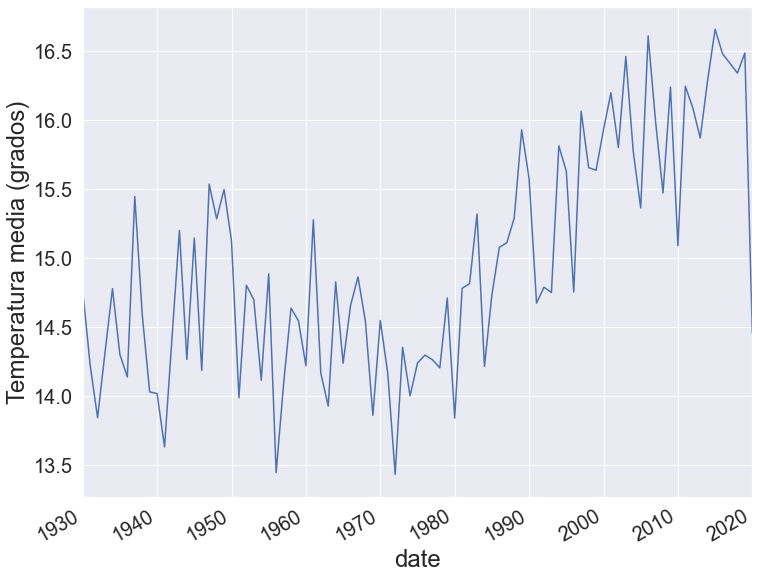

In [49]:
temp.resample('Y').mean()['temp_media'].plot(subplots=True,fontsize=20,figsize=(12,10))
plt.ylabel('Temperatura media (grados)')
plt.show()

In [50]:
temp_media = temp.resample('Y').mean()[['temp_media']]
pre = temp_media.loc[:'1980']
post = temp_media.loc['1981':]
print(pre.mean(),post.mean())

temp_media    14.443701
dtype: float64 temp_media    15.621005
dtype: float64


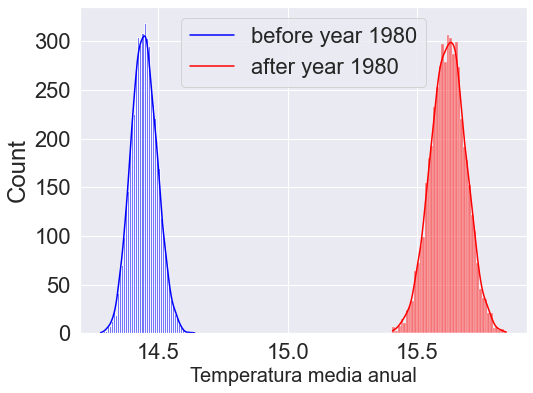

In [51]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(get_random_sample(pre.temp_media,100),color='blue',kde=True,alpha=0.5,ax=ax)  
sns.histplot(get_random_sample(post.temp_media,100),color = 'red',kde=True,ax=ax)  
plt.legend(['before year 1980','after year 1980'])
ax.set_xlabel('Temperatura media anual', fontsize=20)
plt.show()

In [52]:
df_f = data.loc['1983':].copy() # check data from this date only

In [53]:
df_f['temp_media'] = (df_f['temp_max']+df_f['temp_min'])/2
df_f['pres_media'] = (df_f['pres_max']+df_f['pres_min'])/2
df_f.drop(columns=['temp_max','temp_min','pres_max','pres_min','hora_racha','racha_max'],inplace=True)
df_f['lluvia'] = 0
df_f.loc[data.precipitaciones > 0, 'lluvia'] = 1

In [54]:
df_f

,precipitaciones,horas_sol,vel_media,year,month,temp_media,pres_media,lluvia
date,,,,,,,,
1983-01-01,0.0,7.8,0.00,1983,1,2.90,979.85,0
1983-01-02,0.0,7.2,0.00,1983,1,4.90,980.70,0
1983-01-03,0.0,8.1,0.00,1983,1,9.20,982.10,0
1983-01-04,0.0,7.7,0.00,1983,1,8.60,982.10,0
1983-01-05,0.0,4.2,0.00,1983,1,9.30,981.25,0
...,...,...,...,...,...,...,...,...
2020-12-27,0.0,2.5,25.92,2020,12,3.95,957.50,0
2020-12-28,0.0,8.2,9.00,2020,12,7.40,945.65,0
2020-12-29,0.0,7.3,5.04,2020,12,7.70,952.40,0


In [55]:
df_f.isnull().sum()

precipitaciones      0
horas_sol          172
vel_media            0
year                 0
month                0
temp_media           2
pres_media         159
lluvia               0
dtype: int64

In [56]:
df_f.horas_sol = df_f.horas_sol.interpolate()
df_f.pres_media = df_f.pres_media.interpolate()

In [57]:
df_f[df_f.precipitaciones>0]

,precipitaciones,horas_sol,vel_media,year,month,temp_media,pres_media,lluvia
date,,,,,,,,
1983-02-08,12.4,2.8,0.00,1983,2,3.70,954.15,1
1983-02-10,2.2,0.0,0.00,1983,2,0.70,955.00,1
1983-02-12,1.6,0.0,0.00,1983,2,-1.10,952.10,1
1983-02-15,23.6,0.0,0.00,1983,2,2.50,962.65,1
1983-02-23,9.8,0.0,0.00,1983,2,8.00,976.70,1
...,...,...,...,...,...,...,...,...
2020-12-09,0.1,7.0,16.92,2020,12,7.00,960.55,1
2020-12-10,0.7,7.4,7.92,2020,12,9.25,958.70,1
2020-12-11,0.5,3.4,9.00,2020,12,10.75,957.20,1


In [58]:
corr= df_f.corr().round(2)
corr

,precipitaciones,horas_sol,vel_media,year,month,temp_media,pres_media,lluvia
precipitaciones,1.00,-0.32,0.11,-0.01,0.03,-0.09,-0.18,0.47
horas_sol,-0.32,1.00,-0.01,0.12,-0.05,0.43,0.22,-0.50
vel_media,0.11,-0.01,1.00,-0.01,0.00,-0.17,-0.15,0.05
year,-0.01,0.12,-0.01,1.00,0.00,0.07,-0.01,0.02
month,0.03,-0.05,0.00,0.00,1.00,0.25,0.01,0.00
temp_media,-0.09,0.43,-0.17,0.07,0.25,1.00,0.11,-0.14
pres_media,-0.18,0.22,-0.15,-0.01,0.01,0.11,1.00,-0.30
lluvia,0.47,-0.50,0.05,0.02,0.00,-0.14,-0.30,1.00


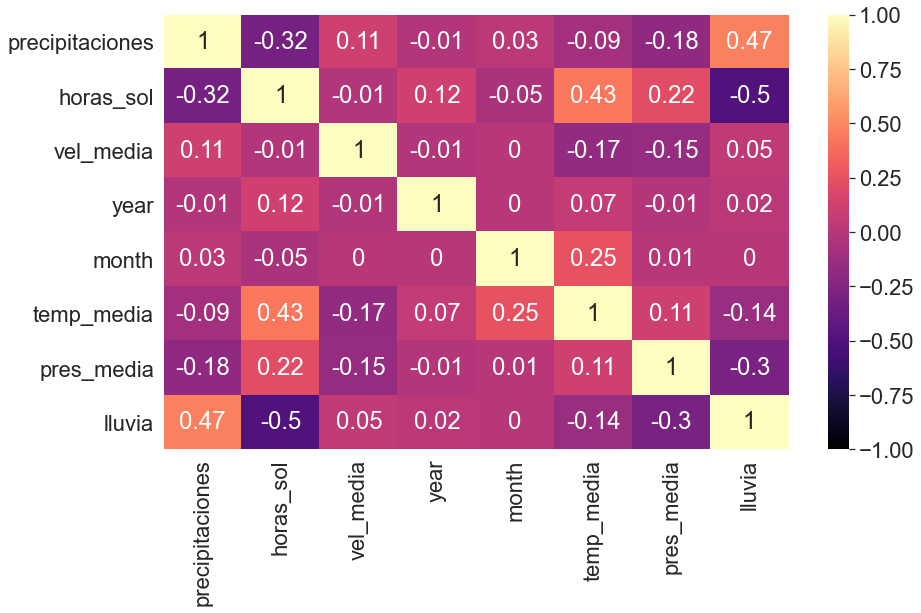

In [59]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(corr,annot=True,ax=ax,vmin=-1.0,vmax=1.0,cmap='magma')
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
#sns.heatmap(corr, annot=True, mask=matrix,ax=ax)

In [60]:
df_f['rain?'] = 'no'
df_f.loc[data.precipitaciones > 0, 'rain?'] = 'yes'


<AxesSubplot:xlabel='rain?', ylabel='pres_media'>

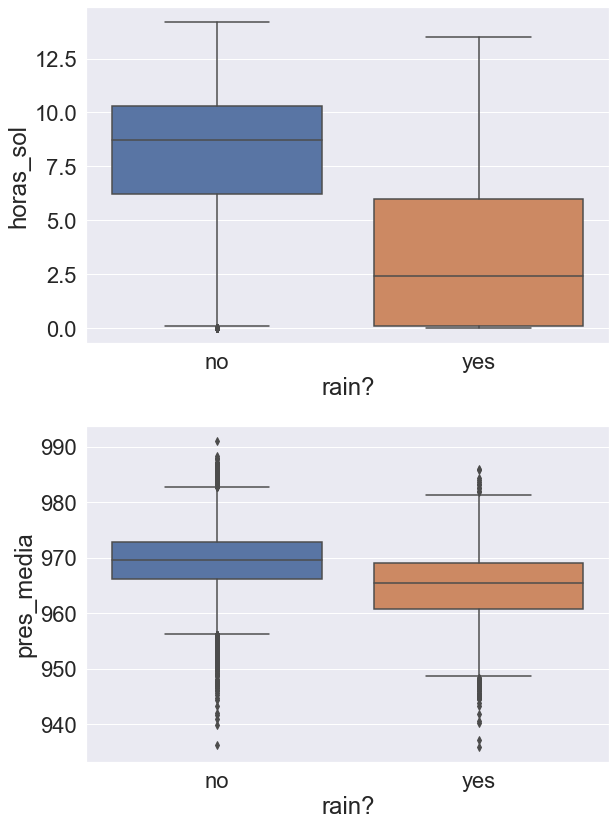

In [61]:
fig, ax = plt.subplots(nrows=2,figsize=(9,12),tight_layout=True)
sns.boxplot(data=df_f,y='horas_sol',x='rain?',ax=ax[0])  
sns.boxplot(data=df_f,y='pres_media',x='rain?',ax=ax[1])  
#sns.boxplot(data=df_f,y='temp_media',x='rain?',ax=ax[2])  
#ax.set_xlabel('l/m2', fontsize=20)

In [62]:
# adicional

In [63]:
dias_sin_lluvia = df_f[df_f.lluvia == 0]
dias_con_lluvia = df_f[df_f.lluvia != 0]

In [64]:
df_a = dias_sin_lluvia.groupby('month')[['horas_sol']].mean()
df_b = dias_con_lluvia.groupby('month')[['horas_sol']].mean()

In [65]:
df_c = pd.concat([df_a,df_b],axis=1)
df_c.columns = ['sin lluvia','con lluvia']
df_c.head()

,sin lluvia,con lluvia
month,,
1,6.431236,1.758974
2,7.300962,2.478716
3,7.333303,2.858308
4,8.668204,3.856823
5,9.702628,4.553345


Text(0, 0.5, 'promedio Horas de Sol')

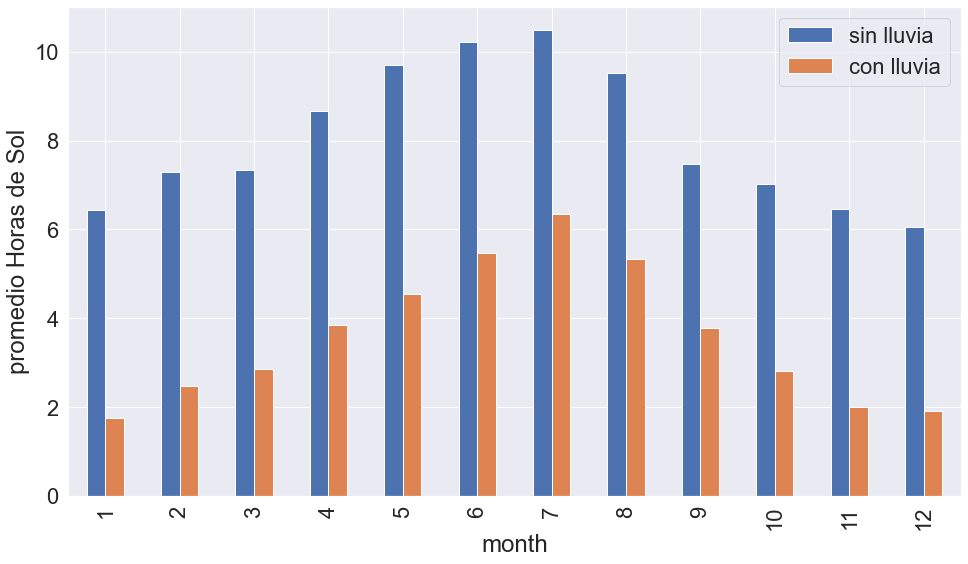

In [66]:
df_c.plot(kind='bar',figsize=(16,9))
plt.ylabel('promedio Horas de Sol')